# Software Programming for Quantum Computation 
*by Ross Mariano*

```{contents}

```

## Technology Stack for Quantum Computing

Technology stack refers to the set of technologies to develop an application, including programming languages, frameworks, databases, front-end and back-end tools, and APIs

These include:
- Hardware
- Physical qubits
- Quantum Error Correction
- Logical qubits
- Quantum Intermediate Representation
- Quantum algorithms

## Workflow for Using Quantum Processing Units as Co-processor

A quantum processing unit (QPU) is the brain of a quantum computer, similar to CPUs being the brain of a clsasical computer.

Classical computers (CPUs, GPUs) uses transistors to manipulate electrical current, producing on and off states. These on and off states are interpreted as the classical bits being either 1 or 0.

QPUs manipulate a *qubit*. These qubits are then represented using basis states $|0\rangle$ and $|1\rangle$.

### How do we create a qubit?

There are numerous techniques on creating qubits

* **Neutral-atom qubits** are atoms containing balanced amount of positive and negative charges. Highly focused laser beams called optical tweezers are used to manipulate the atoms
* **Superconducting qubits** are created using superconducting qubits. This is done by cooling the system near absolute zero. It is the most used method in creating qubits.
* **Photonic qubits** are qubits created using photons. Linear materials such as lenses and mirrors are used to manipulate the qubits.
* **Silicon-based quantum computing** are used in studying for scalability.
* **Quantum Annealing** is an optimization process returning low-energy solutions.
* **Trapped-Ion** also uses electric fields manipulated by lasers. These typically have longer coherence times.

### Superconducting quantum computing

Superconducting quantum computers are used by well-known companies such as IBM and Google. Some of their quantum computers are IBM's Eagle and Google's Sycamore.

Superconductivity happens when resistance of the material goes to zero, this also results in conductivity effectively becoming infinite. This is done by lowering the temperature of the material near absolute zero (0K).

This is advantageous as there will be no loss of energy, which means that we can maintain a qubit's state.

When this happens, the electrons attract the positive nuclei to form regions of high charge density and low charge density. These regions essentially alternate. These charge distribution regions create waves which are called *phonons*.

```{image} ./images/chapter6-supercon1.png
:height: 300px
```

We harness these properties of superconductivity by creating a superconducting LC circuit. A superconducting LC circuit is used as the capacitor is used to measure how much charge can be stored and the inductor measures the strength of the magnetic field.

This is the *superconducting qubit*, also called *artificial atom* in other references.

```{image} ./images/chapter6-supercon2.png
:height: 300px
```

We measure the state of the superconducting qubit by using electromagnetic waves(light) in the microwave range. The energy differences is then measured to determine the actual state.

```{image} ./images/chapter6-supercon3.png
:height: 300px
```


Now, we've shown how we can create a qubit. How do we make this information *useful*?

We've only discussed a QPU. Do other quantum versions of classical technologies exist? Quantum memory, quantum storage, quantum operating system? Research on these things are also being done but are also in their infancy.

Remember that quantum computing is **NOT** meant to replace classical computing. Quantum computing is meant to augment or extend the capabilities of classical computing.

We combine available functionality from quantum computers/qpus and use classical computers for functions not yet available using quantum. We call these *hybrid quantum systems*.

```{image} ./images/chapter6-hybrid.png
:height: 300px
```

However, quantum computers are unavailable for most us due to its extremely high costs.

We can use IBM's quantum computer via the cloud, but it costs $1.60 USD per second. PER SECOND.

```{image} ./images/chapter6-cost1.png
:height: 300px
```

Also, with a quick google search we can see tha quantum computers costs millions of dollars to make.
```{image} ./images/chapter6-cost2.png
:height: 300px
```

So what can we do? We use software to do quantum circuit simulations.

## Software Frameworks for Quantum Programming

This is where quantum circuit simulations come in.

We know the theory, we know the math. We can try to simulate quantum computing on classical hardware.

There are many available quantum software frameworks with different implementations and different philosophies. These are made by big tech companies, universities, and research institutes.

```{image} ./images/chapter6-softwaremap.png
:height: 300px
```

Some software we use using different models are **Qiskit** for the quantum circuit model, **Quimb** for tensor networks model, and **DDSIM** for decision diagrams model.

We will show how to simulate the Bell state circuit using these three different software and representations.

## IBM's Qiskit Software Framework

Qiskit is a quantum software programming framework developed by IBM using the quantum circuit model. It can be used to simulate quantum circuits and quantum algorithms. Qiskit is short for quantum information science kit.

In [1]:
from qiskit import QuantumCircuit

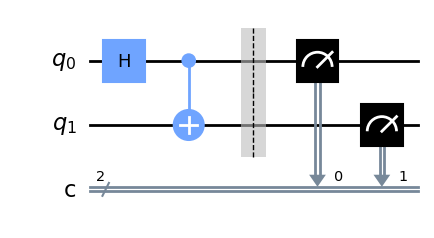

In [2]:
bell_state = QuantumCircuit(2,2)
bell_state.h(0)
bell_state.cx(0,1)
bell_state.barrier(range(2))
bell_state.measure(range(2), range(2))
bell_state.draw('mpl')

In [3]:
from qiskit import transpile
from qiskit_aer import AerSimulator

In [4]:
backend = AerSimulator()

# transpile
bell_state_compiled = transpile(bell_state, backend)

# run the simulator
# measure for 1024 times (default value)
job_sim = backend.run(bell_state_compiled, shots=1024)

# get results
result_sim = job_sim.result()

# get the counts attribute of the result
counts = result_sim.get_counts(bell_state_compiled)
counts

{'00': 509, '11': 515}

## Quimb for Tensor Networks

Quimb is a library for quantum information many-body calculation, focusing primarily on tensor networks.

In [1]:
import quimb as qu
import quimb.tensor as qtn
import numpy as np

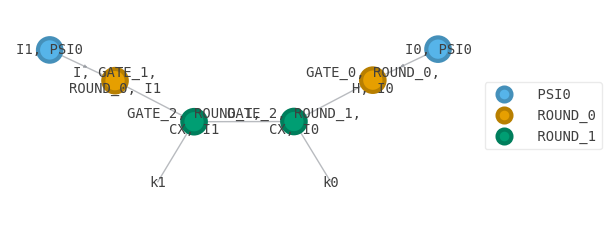

In [2]:
num_qubits = 2
quick_contract = qtn.Circuit(num_qubits)
quick_contract.apply_gate('H', 0, gate_round=0)

I = qu.core.identity(num_qubits)
quick_contract.apply_gate_raw(I, (1,), gate_round=0, tags="I")

quick_contract.apply_gate('CX', 0, 1, gate_round=1)

quick_contract.psi.draw(color=['PSI0'] + [f'ROUND_{i}' for i in range(num_qubits)])

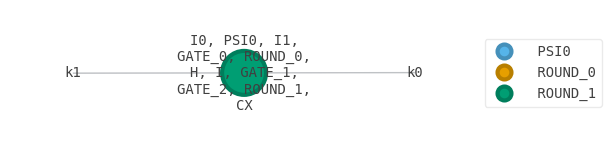

In [3]:
quick_contract = quick_contract.psi.contract()
quick_contract.draw(color=['PSI0'] + [f'ROUND_{i}' for i in range(num_qubits)])

In [4]:
samples = 1024
statevector = quick_contract.data.reshape(4,1)
results = qu.simulate_counts(statevector, samples)
results

{'11': 507, '00': 517}

## DDSIM for Decision Diagrams

MQT DDSIM is a tool for simulating quantum circuits on classical computers by the Chair for Design Automation at the Technical University of Munich. It is free and open-source and can be downloaded from their github page.

In [1]:
from qiskit import QuantumCircuit
from mqt.ddsim import CircuitSimulator

In [2]:
sample_circuit = QuantumCircuit(2)
sample_circuit.h(0)
sample_circuit.cx(0,1)

In [3]:
circuit_sim = CircuitSimulator(sample_circuit)
result = circuit_sim.simulate(shots=1024)
result

{'00': 497, '11': 527}

In [4]:
sv = circuit_sim.get_vector()
sv

[(0.7071067811865476+0j), 0j, 0j, (0.7071067811865476+0j)]

In [5]:
import graphviz

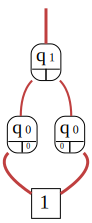

In [ ]:
circuit_viz = circuit_sim.export_dd_to_graphviz_str(
    colored=True,
    edge_labels=False,
    classic=False,
    memory=False,
    format_as_polar=True
)

graphviz.Source(source=circuit_viz)

## References

1. What is a Tech Stack: Examples, Components, and Diagrams. (n.d.). Heap. https://www.heap.io/topics/what-is-a-tech-stack
2. Microsoft. Azure Quantum | Quantum computing stack. (n.d.). https://quantum.microsoft.com/en-us/explore/concepts/quantum-computing-stack
3. Ballon, A. (2023). Neutral-atom quantum computers. PennyLane Demos. https://pennylane.ai/qml/demos/tutorial_neutral_atoms
4. Ballon, A. (2022). Photonic quantum computers. PennyLane Demos. https://pennylane.ai/qml/demos/tutorial_photonics
5. What is Quantum Annealing? — D-Wave System Documentation  documentation. (n.d.). https://docs.dwavesys.com/docs/latest/c_gs_2.html
6. Ballon, A. (2022b). Trapped ion quantum computers. PennyLane Demos. https://pennylane.ai/qml/demos/tutorial_trapped_ions#id1
7. Qiskit contributors. (2023). Qiskit: An Open-source Framework for Quantum Computing.
8. Gray, (2018). quimb: A python package for quantum information and many-body calculations. Journal of Open Source Software, 3(29), 819, https://doi.org/10.21105/joss.00819
9. Robert Wille, Stefan Hillmich, and Lukas Burgholzer. JKQ: JKU tools for quantum computing. In International Conference On Computer Aided Design. 2020.
10. Dave Wecker, & Krysta M.~Svore. (2014). LIQUi|>: A Software Design Architecture and Domain-Specific Language for Quantum Computing.
11. Merritt, R. (2022, September 16). What is a QPU? | NVIDIA Blogs. NVIDIA Blog. https://blogs.nvidia.com/blog/2022/07/29/what-is-a-qpu/
12. Ville Bergholm et al. PennyLane: Automatic differentiation of hybrid quantum-classical computations. 2018. arXiv:1811.04968

